In [3]:
# Installing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import pandas as pd
from scipy import stats
import os

matplotlib.style.use('ggplot')

In [4]:
my_path = "Resources/behavioral_revised_data_final.csv"
main_document = pd.read_csv(my_path)
main_document.head()
# Verifying Image directory to store images
if not os.path.exists('Images'):
    os.mkdir('Images')
    


In [5]:
# groupy by states
groupped_data = main_document.groupby(["State"])
groupped_data.head()

,State,State Code,Sex,Marital Status,Age,Race,Education,Weight(lbs),Height(ft),Income,...,Physical Activity/Day(mints),Smoking,Alcohol/Day,BMI,Blood Pressure,Cholestrol,Heart Disease,Stroke,Cancer,Diabetes
0,Alabama,AL,Female,Widowed,70-74,White only,High School,128.0,4.99980,20000-25000,...,3.000000e+01,Every day,2.0,Overweight,Yes,Yes,No,No,No,No
1,Alabama,AL,Male,Married,>80,White only,College 4yrs,172.0,5.83310,>75000,...,4.000000e+01,Not at all,1.0,Normal Weight,No,No,No,No,No,Yes
2,Alabama,AL,Male,Married,50-54,White only,College 3yrs,135.0,5.33312,35000-50000,...,3.080000e+02,Every day,1.0,Normal Weight,No,No,No,No,No,Yes
3,Alabama,AL,Male,Married,35-39,White only,College 3yrs,190.0,5.99976,15000-20000,...,2.000000e+01,Every day,1.0,Overweight,No,No,No,No,No,No
4,Alabama,AL,Male,Married,65-69,White only,College 4yrs,212.0,5.91643,Refused,...,1.500000e+02,Not at all,1.0,Overweight,Yes,Yes,Yes,Yes,No,No
741,Alaska,AK,Female,Divorced,60-64,White only,College 3yrs,230.0,5.99976,35000-50000,...,4.000000e+01,Not at all,2.0,Obese,No,Yes,No,No,No,No
742,Alaska,AK,Female,Married,70-74,White only,College 4yrs,110.0,5.08313,35000-50000,...,1.500000e+02,Not at all,1.0,Normal Weight,Yes,Yes,No,No,No,No
743,Alaska,AK,Male,Married,40-44,White only,College 4yrs,275.0,5.74977,>75000,...,2.571429e+01,Not at all,4.0,Obese,Yes,No,No,No,No,No
744,Alaska,AK,Male,Married,65-69,White only,College 4yrs,240.0,5.33312,>75000,...,1.464286e+02,Not at all,1.0,Obese,Yes,Yes,No,No,No,No
745,Alaska,AK,Male,Divorced,60-64,White only,High School,160.0,5.58311,20000-25000,...,1.508571e+02,Not at all,2.0,Overweight,Yes,Yes,No,No,No,No


In [8]:
# state_fruit = groupped_data["Fruits/Day"].mean()
state_fruit = groupped_data["Fruits/Day"].mean()
fruit = state_fruit.sort_values(ascending=False).head(10)
fruit

State
District of Columbia    1.578270
Maine                   1.547511
Massachusetts           1.521763
New York                1.517571
Connecticut             1.503867
New Hampshire           1.499822
Vermont                 1.474619
Michigan                1.465914
Rhode Island            1.453083
Oregon                  1.448552
Name: Fruits/Day, dtype: float64

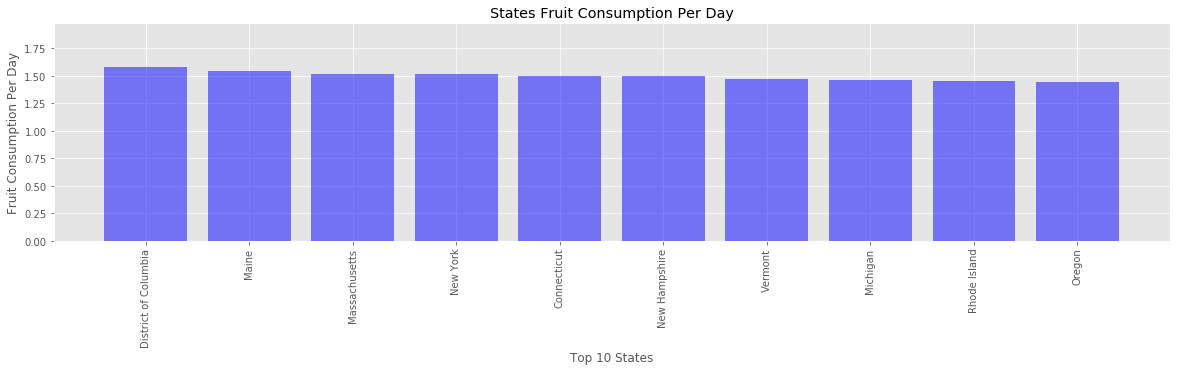

<Figure size 432x288 with 0 Axes>

In [14]:
# States vs Fruit Concumption Per Day
plt.figure(figsize=(20,4))
plt.ylim(0, max(fruit.values)+0.4)
plt.title("States Fruit Consumption Per Day")
plt.xlabel("Top 10 States")
plt.ylabel("Fruit Consumption Per Day")
plt.bar(fruit.index, fruit.values, color='b', alpha=0.5, align="center")
plt.xticks(fruit.index, rotation='vertical')
plt.show()
plt.savefig("./Images/Fruit_aconsumption.png")
plt.tight_layout()


In [11]:
# State vs vegtable cosumption per day
fruit = state_fruit.sort_values(ascending=False).head(10)

state_vegetable = groupped_data["Vegetables/Day"].mean()
vegatable =state_vegetable.sort_values(ascending=False).head(10)
vegatable

State
Vermont                 2.320850
Oregon                  2.315190
Alaska                  2.310080
Texas                   2.296888
California              2.288909
District of Columbia    2.282849
Georgia                 2.282520
Maine                   2.280922
Guam                    2.261548
Nevada                  2.259783
Name: Vegetables/Day, dtype: float64

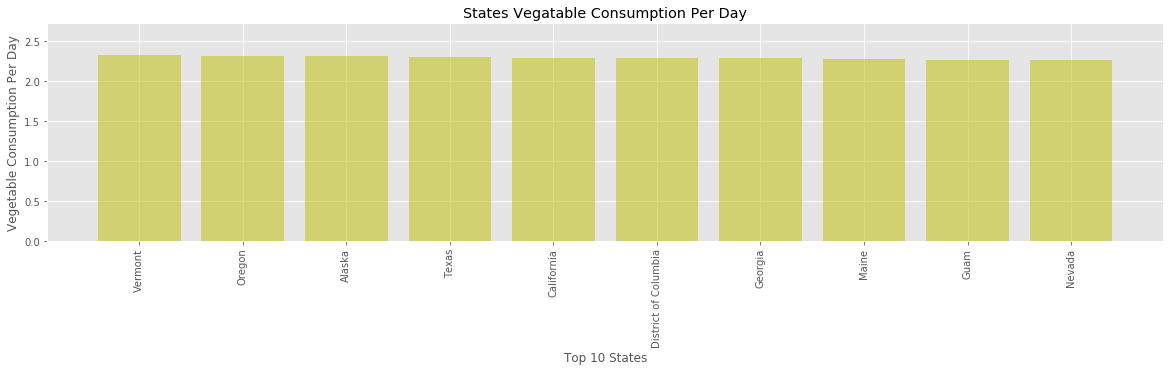

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(vegatable.values)+0.4)
plt.title("States Vegatable Consumption Per Day")
plt.xlabel("Top 10 States")
plt.ylabel("Vegetable Consumption Per Day")
plt.bar(vegatable.index, vegatable.values, color='y', alpha=0.5, align="center")
plt.xticks(vegatable.index, rotation='vertical')
plt.savefig("./Images/Vegatable_consumption.png")

plt.show()
plt.tight_layout()

In [13]:
#Physical Activity vs. state
state_physical = groupped_data["Physical Activity/Day(mints)"].mean()
state_physical.head()

State
Alabama       65.419318
Alaska        78.203023
Arizona       86.034394
Arkansas      80.585447
California    73.998831
Name: Physical Activity/Day(mints), dtype: float64

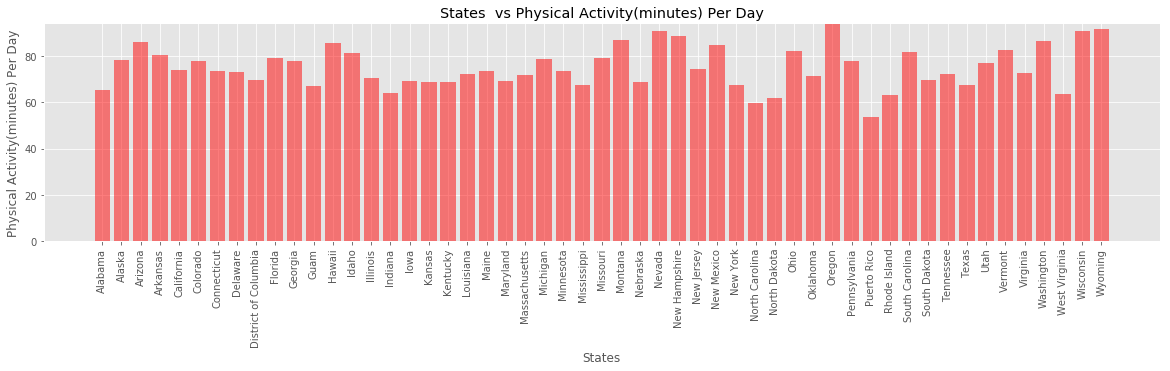

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(state_physical.values)+0.4)
plt.title("States  vs Physical Activity(minutes) Per Day")
plt.xlabel("States")
plt.ylabel("Physical Activity(minutes) Per Day")
plt.bar(state_physical.index, state_physical.values, color='r', alpha=0.5, align="center")
plt.xticks(state_physical.index, rotation='vertical')
plt.savefig("./Images/Pyhsical_activity.png")

plt.show()
plt.tight_layout()

In [11]:
# Drinking vs. state
state_alchohol = groupped_data["Alcohol/Day"].mean()
alcohol = state_alchohol.sort_values(ascending=False).head(10)

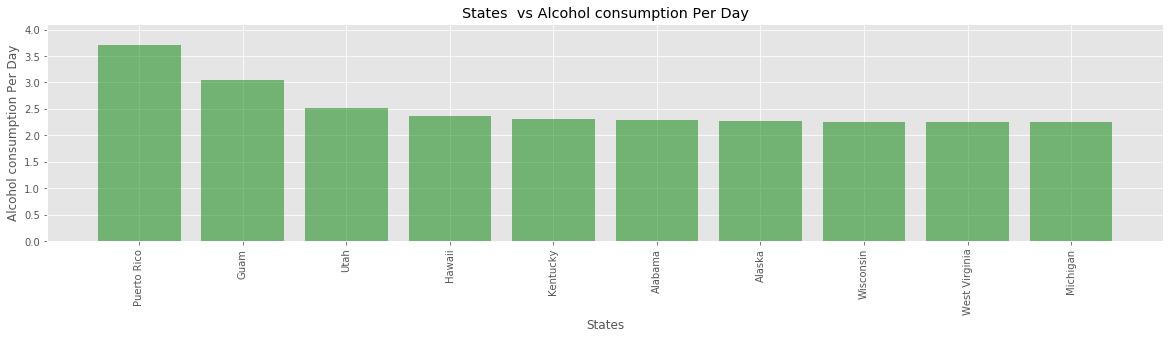

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(20,4))
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(alcohol.values)+0.4)
plt.title("States  vs Alcohol consumption Per Day")
plt.xlabel("States")
plt.ylabel("Alcohol consumption Per Day")
plt.bar(alcohol.index, alcohol.values, color='g', alpha=0.5, align="center")
plt.xticks(alcohol.index, rotation='vertical')
plt.savefig("./Images/State_alcohol.png")
plt.show()
plt.tight_layout()

In [6]:
# Smoking vs. state
# groupped_smoking_data = main_document.groupby(["State","Smoking"]).count()
# groupped_smoking_data = groupped_smoking_data.reset_index()[["State", "Smoking","Sex"]].rename(columns={'Sex':'Count'})

#groupped_smoking_data.head()

In [20]:
# eds = everyday_smokers.plot(kind="bar", stacked=True)
# sds = someyday_smokers(kind="bar", stacked=True)
# ns = non_smokers(kind="bar", stacked=True)

In [22]:
# Smoking counts
main_document["Smoking"].value_counts() 


Not at all             41625
Every day               9134
Some days               4914
Refused                   45
Don´t Know/Not Sure       11
Name: Smoking, dtype: int64

In [23]:
# sub categories of smoking, not at all, everyday and some day smokers per states 
not_at_all = main_document[main_document["Smoking"] == "Not at all"].groupby("State").count()["Smoking"]
every_day = main_document[main_document["Smoking"] == "Every day"].groupby("State").count()["Smoking"]
some_days = main_document[main_document["Smoking"] == "Some days"].groupby("State").count()["Smoking"]

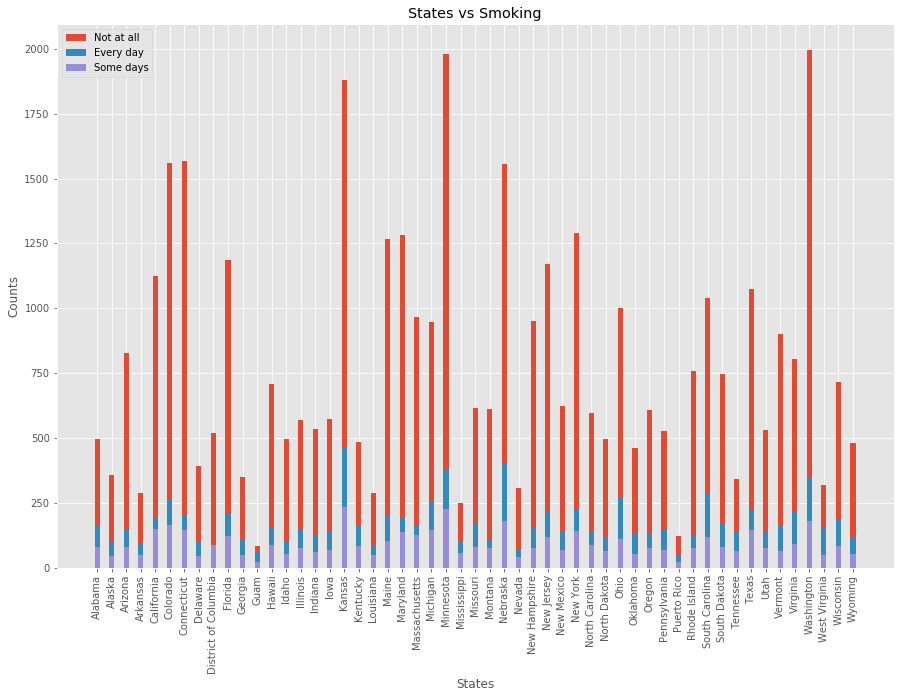

In [24]:
 #Build subplot with three rows and two columns
N=5
fig = plt.figure(figsize=(15, 10))
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
not_at_all = main_document[main_document["Smoking"] == "Not at all"].groupby("State").count()["Smoking"]
every_day = main_document[main_document["Smoking"] == "Every day"].groupby("State").count()["Smoking"]
some_days = main_document[main_document["Smoking"] == "Some days"].groupby("State").count()["Smoking"]

p1 = plt.bar(not_at_all.index, not_at_all.values, width)
p2 = plt.bar(every_day.index, every_day.values, width)
p3 = plt.bar(some_days.index, some_days.values, width )

plt.legend((p1[0], p2[0] , p3[0]), ('Not at all', 'Every day', 'Some days'))
plt.title('States vs Smoking')
plt.xlabel('States')
plt.ylabel("Counts")
plt.xticks(state_alchohol.index, rotation='vertical')
plt.savefig("./Images/Smoking_Per_States.png")
plt.show() 

In [26]:
# to see correlation between fruit consumtions and vegtable conusptions in the U.S.  
main_document[['Vegetables/Day', 'Fruits/Day']].describe()


,Vegetables/Day,Fruits/Day
count,55729.000000,55729.000000
mean,2.100936,1.365982
std,1.283446,1.087938
min,0.000000,0.000000
25%,1.290000,0.670000
50%,1.860000,1.030000
75%,2.580000,2.000000
max,19.500000,20.000000


In [27]:
# Drop outlier
main_document = main_document[main_document['Fruits/Day']!=main_document['Fruits/Day'].max()]

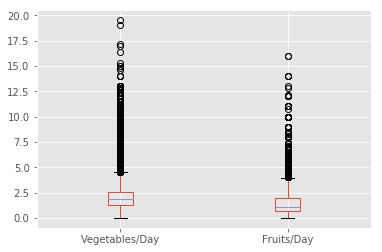

In [28]:
# to make a box plot 
main_document[['Vegetables/Day', 'Fruits/Day']].plot(kind='box')

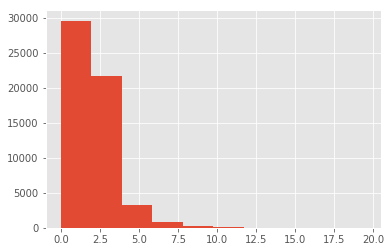

In [29]:
# histogram of vegetable consumption per day 
main_document['Vegetables/Day'].hist()


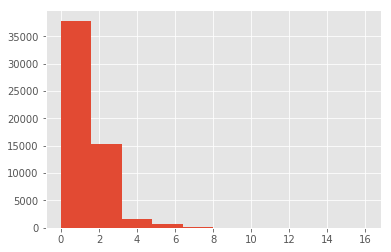

In [30]:
# histogram of Fruit consumption per day 

main_document['Fruits/Day'].hist()


In [31]:
# run paired t-test 
stats.ttest_rel(main_document['Vegetables/Day'], main_document['Fruits/Day'])


Ttest_relResult(statistic=129.87324341416166, pvalue=0.0)

In [38]:
#main_document = main_document[main_document['Weight(lbs)']!=main_document['Weight(lbs)'].max()]
main_document[['Vegetables/Day', 'Weight(lbs)']].describe()
stats.ttest_rel(main_document['Vegetables/Day'], main_document['Weight(lbs)'])

Ttest_relResult(statistic=-943.0871849936107, pvalue=0.0)

In [39]:
main_document[['Fruits/Day', 'Weight(lbs)']].describe()
stats.ttest_rel(main_document['Fruits/Day'], main_document['Weight(lbs)'])

Ttest_relResult(statistic=-947.8028202280905, pvalue=0.0)

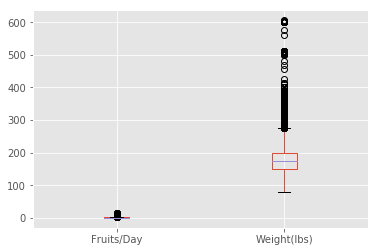

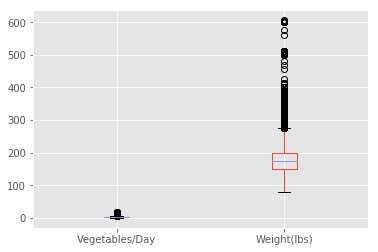

In [37]:
# box plot for bot vegetable and fruit consumption 
main_document[['Fruits/Day', 'Weight(lbs)']].plot(kind='box')
main_document[['Vegetables/Day', 'Weight(lbs)']].plot(kind='box')
